Generation of Blurred Data (Foams) for NN Training
==================================================

This example demonstrates how to generate blurred image data for training neural network models
for deconvolution (deblurring). Foam phantoms from xdesign are used to generate the clean images.

In [1]:
import numpy as np

from scico import plot
from scico.flax.examples import load_foam1_blur_data
plot.config_notebook_plotting()

Read data from cache or generate if not available.

In [2]:
n = 3  # convolution kernel size
σ = 20.0 / 255  # noise level
psf = np.ones((n, n)) / (n * n)  # kernel

train_nimg = 416  # number of training images
test_nimg = 64  # number of testing images
nimg = train_nimg + test_nimg
output_size = 256  # image size

train_ds, test_ds = load_foam1_blur_data(
    train_nimg,
    test_nimg,
    output_size,
    psf,
    σ,
    verbose=True,
)

2022-11-28 11:12:40,139	INFO worker.py:1518 -- Started a local Ray instance.


Platform                  :   gpu
Device count              :   8
Data generation    time[s]:    63.71
Blur generation    time[s]:     9.33
Storing data in path      :   ~/.cache/scico/examples/data
Set --training--          :   Size:   416
Set --testing --          :   Size:   64
Data range -- images --   :    Min:   0.00, Max: 1.00
Data range -- labels --   :    Min:   0.00, Max: 1.00


Plot randomly selected sample.

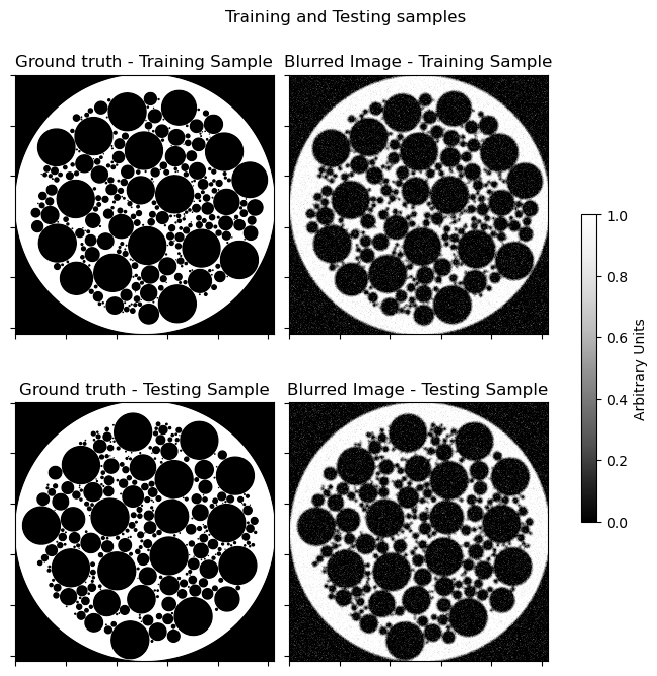

In [3]:
indx_tr = np.random.randint(0, train_nimg)
indx_te = np.random.randint(0, test_nimg)
fig, axes = plot.subplots(nrows=2, ncols=2, figsize=(7, 7))
plot.imview(
    train_ds["label"][indx_tr, ..., 0],
    title="Ground truth - Training Sample",
    fig=fig,
    ax=axes[0, 0],
)
plot.imview(
    train_ds["image"][indx_tr, ..., 0],
    title="Blurred Image - Training Sample",
    fig=fig,
    ax=axes[0, 1],
)
plot.imview(
    test_ds["label"][indx_te, ..., 0],
    title="Ground truth - Testing Sample",
    fig=fig,
    ax=axes[1, 0],
)
plot.imview(
    test_ds["image"][indx_te, ..., 0],
    title="Blurred Image - Testing Sample",
    fig=fig,
    ax=axes[1, 1],
)
fig.suptitle(r"Training and Testing samples")
fig.tight_layout()
fig.colorbar(
    axes[0, 1].get_images()[0],
    ax=axes,
    shrink=0.5,
    pad=0.05,
    label="Arbitrary Units",
)
fig.show()